# Homework 5

Due by 11:00pm on February 23, 2023

For submission instructions, see:
http://faculty.washington.edu/rjl/classes/am574w2023/homework5.html

Ideally you will do this homework by modifying this Jupyter notebook `$AM574/homeworks/hw5/hw5.ipynb` to fill in the solutions, with plots to accompany your results.  If necessary you can scan some handwritten things instead.

## Isothermal p-system

All of the problems below concern the same nonlinear hyperbolic system 
$q_t + f(q)_x=0$ given by the p-system arising from Lagrangian gas dynamics (2.108)
in the case of isothermal flow (as in Problem 2.8(b) from hw1):

$$
\begin{split}
v_t - u_x &= 0,\\
u_t + (a^2/v)_x &=0.
\end{split}
$$

Write out formulas for general values of $a$ but use $a=2$ for the specific examples.

The figure below shows a set of Hugoniot loci (in red and blue) and integral
curves of the eigenvectors (in green and magenta) through the set of points $(v_*,u_*)$ 
where $u_*=0$ and $v_* = 0.5,~1,~1.5,~\ldots,~10$ (marked with dots in the figure).

Note that these curves agree well near the points $(v_*,u_*)$ but are not
identical farther away.

You will be asked to produce a similar figure and this shows what you are aiming for.

In [45]:
%matplotlib inline

In [52]:
from pylab import *

In [48]:
from IPython.display import Image
Image('isothermal1.png', width=500)

**Question 1.** 

Work out the flux Jacobian and its eigenvalues and eigenvectors.
Show that both characteristic families are genuinely nonlinear.

We have that
$$\begin{pmatrix}
	v\\u
\end{pmatrix}_t+\begin{pmatrix}
0 &-1\\
p'(v) &0
\end{pmatrix}\begin{pmatrix}
v\\u
\end{pmatrix}_x,$$
where $p(v)=a^2/v$, so the flux Jacobian is
$$\begin{pmatrix}
0 &-1\\
-a^2/v^2 &0
\end{pmatrix}.$$
Per Mathematica, this has eigenvalues
$$\lambda^1=-\frac{a}{v},\quad\lambda^2=\frac{a}{v}$$
and eigenvectors
$$r^1=\begin{pmatrix}
1\\a/v\end{pmatrix},\quad 
r^2=\begin{pmatrix}
1\\-a/v\end{pmatrix}.$$
To see that the characteristic families are genuinely nonlinear, we compute
$$\nabla\lambda^1=\begin{pmatrix}a/v^2\\0\end{pmatrix},\quad\nabla\lambda^2=\begin{pmatrix}-a/v^2\\0\end{pmatrix}.$$
Then,
$$\nabla\lambda^1\cdot r^1=\frac{a}{v^2}\neq0,\quad\nabla\lambda^2\cdot r^2=-\frac{a}{v^2}\neq0,$$
for any $v\neq0$. Of course, the original system is undefined at $v=0$.

**Question 2.** 

Following Section 13.8.1, work out the equations for the integral
curves of the eigenvectors through an arbitrary point
$(v_*, u_*)$, e.g. specifying $u(v)$ as $v$ varies (with $u(v_*) = u_*$).
You may find it convenient to use this to define Python functions
`uint1(v,vstar,ustar,a)`, `uint2(v,vstar,ustar,a)`, so that you can easily plot these as
functions of $v$.

For $r^1$, we have that 
$$\tilde v'=1,\quad \tilde u'=a/\tilde v.$$
Based on this, we set 
$$\tilde v(\xi)=\xi,$$
which yields
$$\tilde u'(\xi)=\frac{a}{\xi}.$$
This has general solution
$$\tilde u=a\log\xi+C.$$
Plugging in $u(v_*) = u_*$, we solve for $C$ and get
$$u=u_*+a\log\frac{v}{v_*}.$$
Similarly, for $r^2$, we just replace $a\to-a$ to get the new general solution
$$\tilde u=-a\log\xi+C.$$
Again plugging in $u(v_*) = u_*$, we solve for $C$ and get
$$u=u_*-a\log\frac{v}{v_*}.$$

In [84]:
def uint1(v,vstar,ustar,a):
    return ustar+a*log(v/vstar)

In [85]:
def uint2(v,vstar,ustar,a):
    return ustar-a*log(v/vstar)

**Question 3.** 

Determine similar equations for the Hugoniot loci through an
arbitrary point $(v_*, u_*)$, e.g. specifying $v(u)$ as $u$ varies
away from $u_*$.  You may find it convenient to use this to define Python functions
`uhug1(v,vstar,ustar)`, `uhug2(v,vstar,ustar)`, so that you can easily plot these as
functions of $v$.

Also give the formula for the shock speed $s(v)$
for any point $(v,u(v))$ along this curve and show that this can be written as

$$
s(v)= \pm \frac{a}{\sqrt{vv_*}}.
$$

(Note that, as expected, this converges
to the corresponding eigenvalue as $v \rightarrow v_*$.)

Applying Rankine--Hugoniot to this problem yields the system
$$s(v_*-v)=-u_*+u\\
s(u_*-u)=a^2/v_*-a^2/v.$$
We solve for s
$$s=\frac{u-u_*}{v_*-v},$$
which allows us to find 
$$u=u_*\pm\sqrt{\left(\frac{a^2}{v_*}-\frac{a^2}{v}\right)(v-v_*)}=u_*\pm\sqrt{\frac{a^2}{vv_*}}(v-v_*).$$
Plugging this back in for $s$, we get that
$$s(v)=\mp\sqrt{\frac{a^2}{vv_*}}=\mp \frac{a}{\sqrt{vv_*}},$$
as desired.

In [113]:
def uhug1(v,vstar,ustar,a):
    return ustar - sqrt(a**2/(v*vstar))*(v-vstar)

In [114]:
def uhug2(v,vstar,ustar,a):
    return ustar + sqrt(a**2/(v*vstar))*(v-vstar)

**Question 4.** 

For the particular case $a=2$,
plot these curves to produce a plot similar to that shown above, and
indicate which curves correspond to which family and which are Hugoniot
loci or integral curves.  If you can't produce your own plot, at least
figure this out for the plot shown above, as best you can, and specify what
each color curve corresponds to.

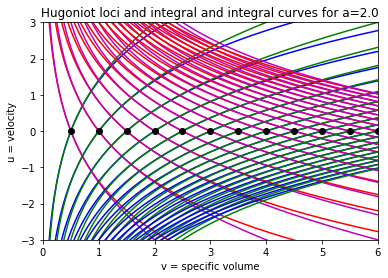

In [121]:
a = 2.0
ustar = 0.0
vstarvec = linspace(0.5,10.0,20)
vvec = linspace(0.01,6.0,10000)
figure()
ylim(-3,3)
xlim(0,6)
title('Hugoniot loci and integral and integral curves for a=2.0')
xlabel('v = specific volume')
ylabel('u = velocity')
for vstar in vstarvec:
    ui1 = [uint1(vv,vstar,ustar,a) for vv in vvec]
    ui2 = [uint2(vv,vstar,ustar,a) for vv in vvec]
    uh1 = [uhug1(vv,vstar,ustar,a) for vv in vvec]
    uh2 = [uhug2(vv,vstar,ustar,a) for vv in vvec]    
    plot(vvec,ui1,color='b')
    plot(vvec,ui2,color='r')
    plot(vvec,uh1,color='m')
    plot(vvec,uh2,color='g')
    plot(vstar,ustar, 'o', color='k')

Here the blue is the first integral curve, red is the second integral curve, magenta is the first Hugoniot locus, and green is the second Hugoniot locus.

**Question 5.** 

Given the physical interpretation of this system (and remembering that $q=(v,u)$),
we expect that if
$q_\ell = (1,-2)$ and $q_r = (1,2)$, then the solution to the 
Riemann problem with this data should consist of two rarefaction waves.
For the case $a=2$, determine the middle state $q_m$ for this solution. 
You should be able to solve this analytically.

Confirm that this is the physically correct solution by considering how the relevant eigenvalue varies as you move from $q_\ell$ to $q_m$ to $q_r$.

*Note:* You do not need to find the form of the rarefaction waves
$\tilde q(x/t)$ for this homework.  But you will for the next homework, so
you might want to think about this too.


The middle state of an all-rarefaction solution must satisfy
$$\begin{cases}
u_m=u_l+a\log\left(\frac{v_m}{v_l}\right)\\
u_m=u_r-a\log\left(\frac{v_m}{v_r}\right)\end{cases}.$$
Plugging in the given values, we have
$$\begin{cases}
u_m=-2+2\log\left(v_m\right)\\
u_m=2-2\log\left(v_m\right)\end{cases}.$$
Solving this gives $u_m=0$, $v_m=e$, so $q_m=(e,0)$. To confirm that this is physically correct, we observe that 
$$-2=\lambda^1(q_l)<\lambda^1(q_m)=-\frac{2}{e},\quad\frac{2}{e}=\lambda^2(q_m)<\lambda^2(q_r)=2.$$

**Question 6.** 

What is the two-shock Riemann solution for arbitrary $q_\ell$ and
$q_r$?  You should also be able to solve this analytically.  

*Hint:* solve a quadratic equation for $\sqrt{v_m}$.

As an example, what is the 2-shock solution for the data from the previous
part, $a=2, ~q_\ell = (1,-2)$ and $q_r = (1,2)$?

How far is this from the correct middle state from the 2-rarefaction solution?

The middle state of an all-shock solution must satisfy
$$\begin{cases}
u_m=u_l-\frac{a}{\sqrt{v_lv_m}}(v_m-v_l)\\
u_m=u_r+\frac{a}{\sqrt{v_rv_m}}(v_m-v_r)\end{cases}.$$
Equating these, we get a quadratic in $\sqrt{v_m}$
$$\frac{a(\sqrt{v_l}+\sqrt{v_r})}{\sqrt{v_lv_r}}v_m+(u_r-u_l)\sqrt{v_m}-a(\sqrt{v_l}+\sqrt{v_r})=0.$$
Then,
$$\sqrt{v_m}=\frac{\sqrt{v_lv_r}\left(u_l-u_r\pm\sqrt{(u_r-u_l)^2+4a^2\frac{(\sqrt{v_l}+\sqrt{v_r})^2}{\sqrt{v_lv_r}}}\right)}{2a(\sqrt{v_l}+\sqrt{v_r})}.$$
$v_m$ is then the square of this term. Plugging this into either equation of our system then gives $u_m$. The sign can be chosen by verifying that the two equations for $u_m$ agree.
Plugging $q_l,q_r$ into our formulae for our example, we get that $\sqrt{v_m}=\frac{-1\pm\sqrt{5}}{2}$, $v_m=\frac{3\mp\sqrt{5}}{2}$. The plus sign gives two different values for $u_m$, so we have $v_m=\frac{3-\sqrt{5}}{2}$ and $u_m=0$. While this has the same $u_m$ as the correct rarefaction solution, $e-\frac{3-\sqrt{5}}{2}\approx2.37$, so this is quite far off in $v_m$.

**Question 7.** 

Produce a phase plane plot that shows $q_\ell,~q_m,~q_r$, and the curves connecting them from the answer to Question 5, and also the Hugoniot loci from Question 6.


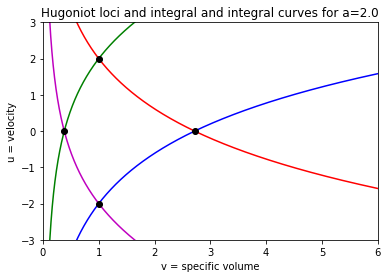

In [122]:
a = 2.0
vl = 1.0
vr = 1.0
ul = -2.0
ur = 2.0
vm1 = exp(1)
vm2 = (3-sqrt(5))/2
um = 0.0
vvec = linspace(0.01,6.0,10000)
figure()
ylim(-3,3)
xlim(0,6)
title('Hugoniot loci and integral and integral curves for a=2.0')
xlabel('v = specific volume')
ylabel('u = velocity')
ui1 = [uint1(vv,vl,ul,a) for vv in vvec]
ui2 = [uint2(vv,vr,ur,a) for vv in vvec]
uh1 = [uhug1(vv,vl,ul,a) for vv in vvec]
uh2 = [uhug2(vv,vr,ur,a) for vv in vvec]
plot(vvec,ui1,color='b')
plot(vvec,ui2,color='r')
plot(vvec,uh1,color='m')
plot(vvec,uh2,color='g')
plot(vl,ul, 'o', color='k')
plot(vr,ur, 'o', color='k')
plot(vm1,um, 'o', color='k')
plot(vm2,um, 'o', color='k')

We have the same color scheme as before but now only plot the curves passing through $q_l,q_r$. The top point is $q_r$ and the bottom point is $q_l$. The right point is the physically correct (rarefaction) solution while the left point is the physically incorrect (shock) solution.